11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


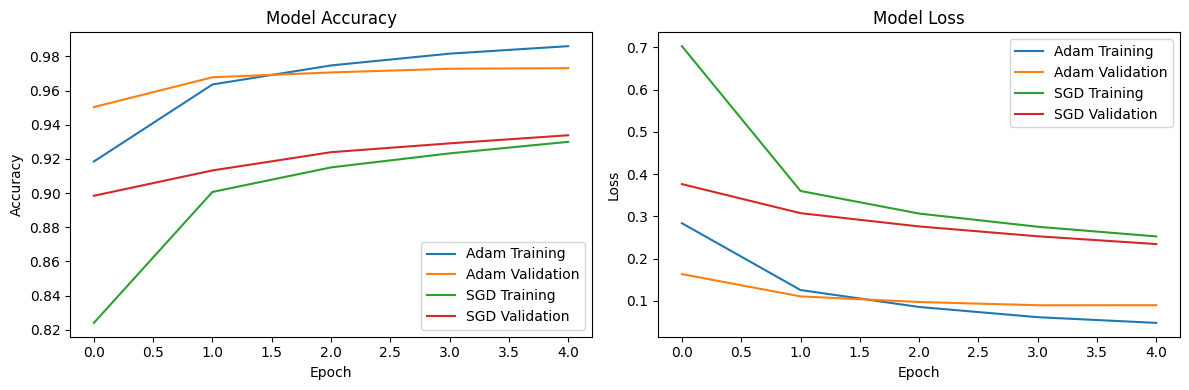

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 2. Define model architecture
def create_model():
    return Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

# Train with Adam
model_adam = create_model()
model_adam.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Train with SGD
model_sgd = create_model()
model_sgd.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# 3. Compare performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam Training')
plt.plot(history_adam.history['val_accuracy'], label='Adam Validation')
plt.plot(history_sgd.history['accuracy'], label='SGD Training')
plt.plot(history_sgd.history['val_accuracy'], label='SGD Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam Training')
plt.plot(history_adam.history['val_loss'], label='Adam Validation')
plt.plot(history_sgd.history['loss'], label='SGD Training')
plt.plot(history_sgd.history['val_loss'], label='SGD Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
